Task: Make a sign language detector 

you can follow these links 
- https://www.youtube.com/watch?v=JNZ7oFaH1fg
- https://github.com/EvilPort2/Sign-Language
- https://www.youtube.com/watch?v=NQPV2344cGE
- https://github.com/luvk1412/Sign-Language-to-Text
- https://www.youtube.com/watch?v=2fXJe9YqXgU
- https://towardsdatascience.com/american-sign-language-recognition-using-cnn-36910b86d651
- https://github.com/themechanicalcoder/American-Sign-Language-Recognition

dataset :
- https://www.kaggle.com/grassknoted/asl-alphabet
- https://www.kaggle.com/datamunge/sign-language-mnist

based on above references or you can search for more better resources .you need to build language sign detection model.
you can choose any dataset which gives better results .
steps you need to follow during model pipeline 

- Preprocessing
- Model Training 
- Model Testing 
- Model performance metrics 
- save model for future use

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

In [2]:
# tensor flow with gpu

import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 0 for GPU
                                         # -1 for CPU
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


In [3]:
train_data = pd.read_csv('sign_mnist_train.csv').copy()
print(train_data.shape)
train_data.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


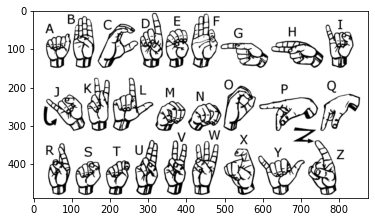

In [4]:
image1 = cv2.imread('american_sign_language.PNG')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

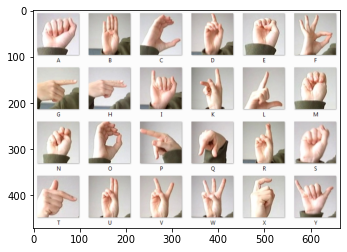

In [5]:
image2 = cv2.imread('amer_sign2.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

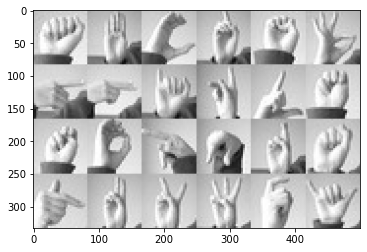

In [6]:
image3 = cv2.imread('amer_sign3.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)

In [7]:
X_train = train_data.iloc[:,1:]
X_train = np.asarray(X_train)
X_train = X_train.reshape(-1,28,28,1)
x_train = X_train

y_train = train_data.iloc[:,0]

In [8]:
print(X_train.shape, y_train.shape)

(27455, 28, 28, 1) (27455,)


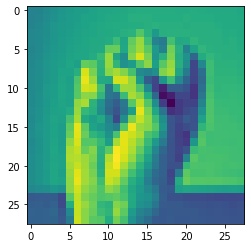

In [9]:
plt.imshow(X_train[10])

In [10]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [12]:
INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = len(labels)
print(INPUT_SHAPE, OUTPUT_SHAPE)

(28, 28, 1) 26


In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [14]:
es = EarlyStopping(monitor='Accuracy', patience=1, restore_best_weights=True)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.3, verbose=2)

Epoch 1/10
38/38 - 11s - loss: 2.6408 - accuracy: 0.2873 - val_loss: 1.5058 - val_accuracy: 0.5470
Epoch 2/10
38/38 - 1s - loss: 1.1302 - accuracy: 0.6475 - val_loss: 0.5223 - val_accuracy: 0.8731
Epoch 3/10
38/38 - 1s - loss: 0.5810 - accuracy: 0.8111 - val_loss: 0.2065 - val_accuracy: 0.9587
Epoch 4/10
38/38 - 1s - loss: 0.3339 - accuracy: 0.8894 - val_loss: 0.0797 - val_accuracy: 0.9908
Epoch 5/10
38/38 - 1s - loss: 0.2332 - accuracy: 0.9241 - val_loss: 0.0366 - val_accuracy: 0.9981
Epoch 6/10
38/38 - 1s - loss: 0.1564 - accuracy: 0.9491 - val_loss: 0.0211 - val_accuracy: 0.9992
Epoch 7/10
38/38 - 1s - loss: 0.1186 - accuracy: 0.9613 - val_loss: 0.0125 - val_accuracy: 0.9995
Epoch 8/10
38/38 - 1s - loss: 0.0936 - accuracy: 0.9709 - val_loss: 0.0087 - val_accuracy: 0.9996
Epoch 9/10
38/38 - 1s - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.0045 - val_accuracy: 0.9999
Epoch 10/10
38/38 - 1s - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.0028 - val_accuracy: 0.9999


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

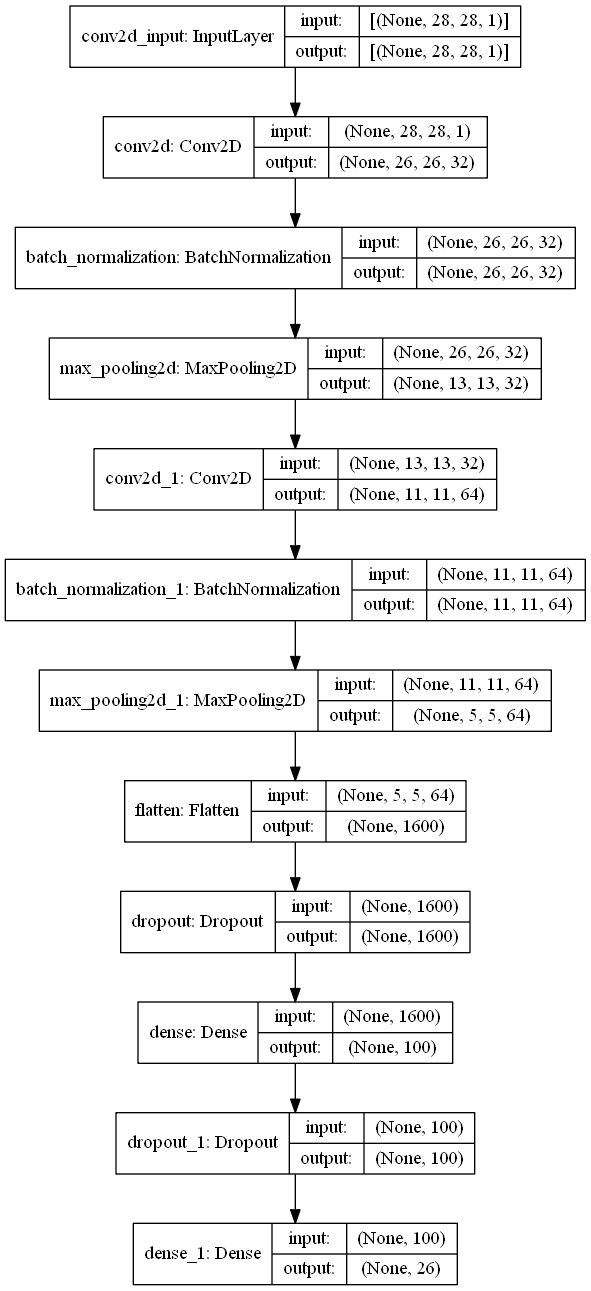

In [18]:
plot_model(model, show_shapes=True)

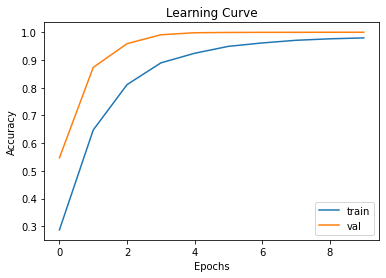

In [19]:
plt.title("Learning Curve")
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

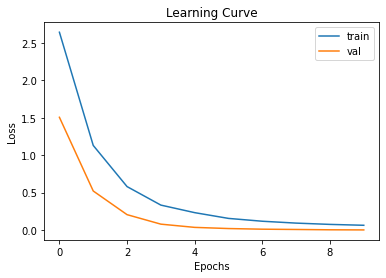

In [20]:
plt.title("Learning Curve")
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
test_data = pd.read_csv('sign_mnist_test.csv').copy()
print(test_data.shape)
test_data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [22]:
X_test = test_data.iloc[:,1:]
X_test = np.asarray(X_test)
X_test = X_test.reshape(-1,28,28,1)
X_test = X_test

y_test = test_data.iloc[:,0]

In [23]:
print(X_test.shape, y_test.shape)

(7172, 28, 28, 1) (7172,)


In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

225/225 - 1s - loss: 0.2393 - accuracy: 0.9272


In [25]:
model.save('sign_lang_detect_model.h5')

In [26]:
from tensorflow.keras.models import load_model
model = load_model('sign_lang_detect_model.h5')

In [48]:
test_image = cv2.imread(r'C:\Users\dariu\Desktop\WIN_20210919_06_57_22_Pro.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.GaussianBlur(test_image, (7, 7), 0)

In [49]:
def classify(image):
    image = cv2.resize(image,(28,28))
    image = image.reshape(1, 28, 28, 1)
    pred = model.predict([image])
    idx = np.argmax(pred)
    return labels[idx]

In [50]:
classify(test_image)

'X'

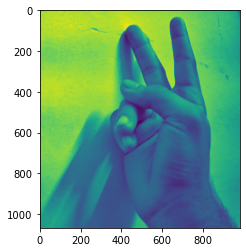

In [51]:
plt.imshow(test_image)

In [28]:
from keras.preprocessing.image import img_to_array

In [12]:
def classify(image):
    image = cv2.resize(image, (28,28))
    image = image.astype('float')
    image = img_to_array(image)
    image = image.reshape(1,28,28,1)
    pred = model.predict([image])
    idx = np.argmax(pred)
    return labels[idx]

In [17]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    image2 = cv2.imread('amer_sign2.png')
    cv2.imshow('image', image2)
    
    frame = cv2.flip(frame, 1)
    top, right, bottom, left = 75, 350, 300, 590
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    alpha = classify(gray)
    cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,alpha,(0,130),font,5,(0,0,255),2)
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    image2 = cv2.imread('amer_sign2.png')
    cv2.imshow('image', image2)
    
    frame = cv2.flip(frame, 1)
    top, right, bottom, left = 75, 350, 300, 590
    roi = frame[top:bottom, right:left]
    roi=cv2.flip(roi,1)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    cv2.imshow('roi',gray)
    alpha=classify(gray)
    cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,alpha,(0,130),font,5,(0,0,255),2)
    #cv2.resize(img,(1000,1000))
    cv2.imshow('img',frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()